# Linear Regressions

In [1]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical analysis
from scipy.stats import linregress
from scipy.stats import ttest_1samp

In [2]:
# read in data
df = pd.read_csv("../data/clean_data/range_cleaned_vehicle_data.csv").set_index("VIN (1-10)")
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
VIN (1-10),,,,,,,,,,,
WAUTPBFF4H,King,Seattle,WA,98126,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.544680,-122.374105
WAUUPBFF2J,Thurston,Olympia,WA,98502,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,47.059252,-122.943445
5YJSA1E22H,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),210,47.083975,-122.780830
1C4JJXP62M,Thurston,Tenino,WA,98589,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),25,46.856085,-122.854030
5YJ3E1EC9L,Yakima,Yakima,WA,98902,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),308,46.597394,-120.524012


In [3]:
def linear_plot(x, y, xlabel, ylabel, title):
    """ Perform linear regression and plot results

    Args:
        x (iterable): The x values to be used in the regression and plot
        y (iterable): The y values to be used in the regression and plot
        xlabel (string): The label for the x-axis
        ylabel (string): The label for the y-axis
        title (string): The title of the plot

    Returns:
        tuple: Tuple containing the regression line equation and r-value
    """

    # perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    regress_values = x * slope + intercept

    # set up plot
    plt.figure(figsize=(10, 6))

    # plot
    sns.scatterplot(x=x, y=y, color="#022200")
    plt.plot(x, regress_values, color="#6B9250")

    # format plot
    plt.title(title, fontsize=16, fontweight="bold")
    plt.xlabel(xlabel, fontsize=12, fontstyle="italic")
    plt.ylabel(ylabel, fontsize=12, fontstyle="italic")

    # return regression line equation and r-squared
    return line_eq, rvalue

## Regression on both types of vehicles

The r-squared is: 0.00538442083209442


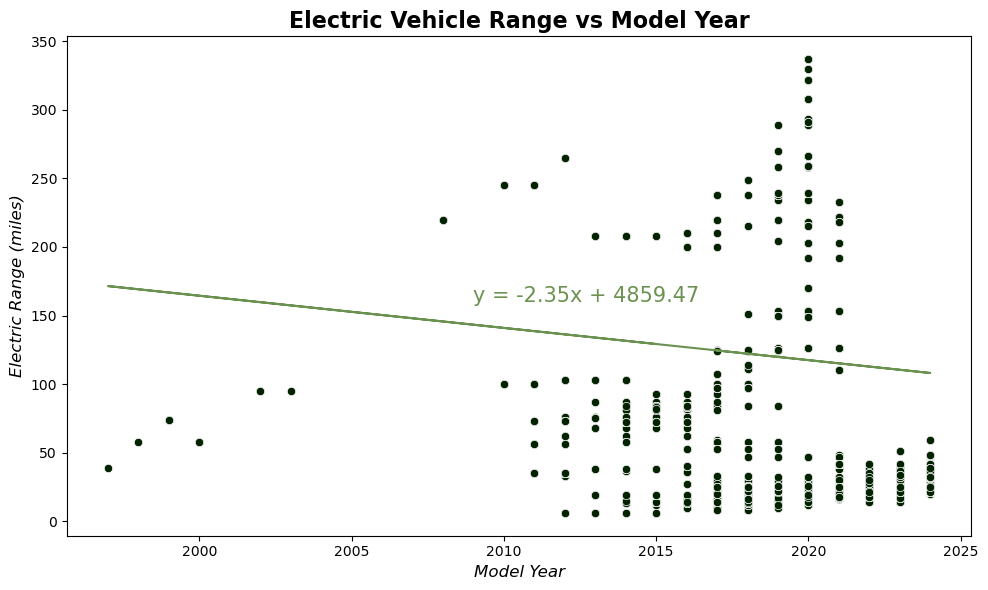

In [4]:
# plot combined range vs. model year with the regression line

# set up variables for linear regression and plotting
ranges = df["Electric Range"]
model_year = df["Model Year"]
title = "Electric Vehicle Range vs Model Year"
xlabel = "Model Year"
ylabel = "Electric Range (miles)"

# plot
line_eq, rvalue = linear_plot(model_year, ranges, xlabel, ylabel, title)

# add regression line equation
plt.annotate(line_eq, (2009, 160), fontsize=15, color="#6B9250")

# print r-squared
print(f"The r-squared is: {rvalue**2}")

# save/show plot
plt.tight_layout()
plt.savefig("images/combined_regression.png")
plt.show()

*There is no correlation (r-squared=0.01).* This is probably due to the number of hybrid vehicles that also rely on an internal combustion engine.

In [5]:
# seperate full electric and hybrid and get only the vehicles since 2010 since there is little data before then
full_electric_df = df.loc[df["Electric Vehicle Type"].str.contains("BEV") & (df["Model Year"] >= 2010)]
hybrid_df = df.loc[df["Electric Vehicle Type"].str.contains("PHEV") & (df["Model Year"] >= 2010)]

## Regression on Full Electric Vehicles

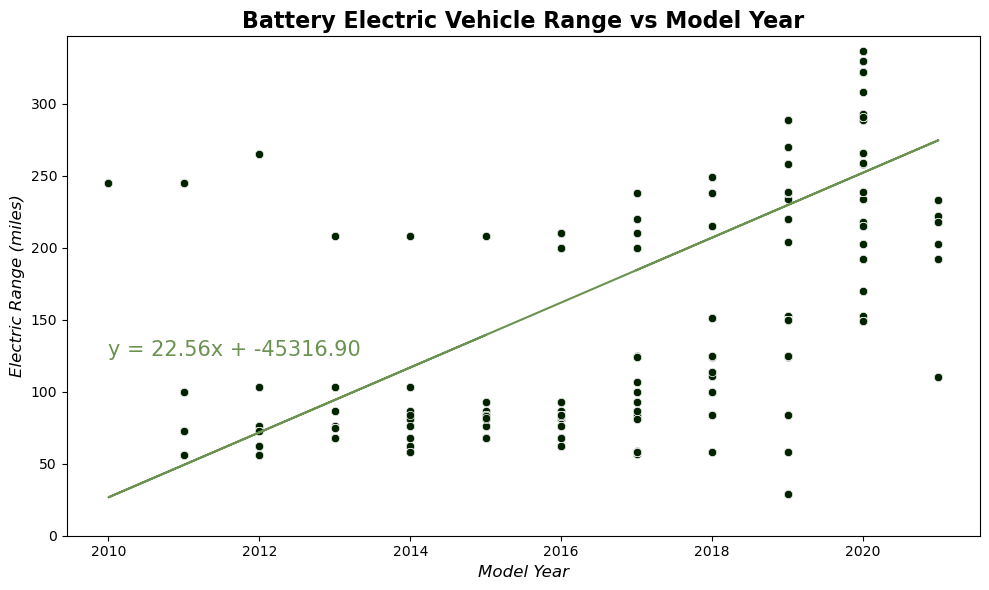

In [6]:
# plot full electric vehicle range vs. model year with the regression line

# set up variables for linear regression and plotting
full_electric_model_year = full_electric_df["Model Year"]
full_electric_range = full_electric_df["Electric Range"]
title = "Battery Electric Vehicle Range vs Model Year"
xlabel = "Model Year"
ylabel = "Electric Range (miles)"

# plot
full_electric_line_eq, full_electric_rvalue = linear_plot(full_electric_model_year, full_electric_range, xlabel, ylabel, title)

# limit the y-axis to show the full range of electric cars
plt.ylim(0, full_electric_range.max() + 10)

# add regression line equation
plt.annotate(full_electric_line_eq, (2010, 125), fontsize=15, color="#6B9250")

# save/show plot
plt.tight_layout()
plt.savefig("images/full_electric_regression.png")
plt.show()

*There is a positive correlation (r-squared=0.51).* This is probably due to the increase in sales and improving battery technology.

## T-tests

In [7]:
# Test for significance of full electric cars average range vs. model year

# get average range by model year
full_electric_mean_ranges = full_electric_df.groupby("Model Year")["Electric Range"].mean()
# get overall average range
overall_mean_range = df["Electric Range"].mean()

# perform t-test
ttest_1samp(full_electric_mean_ranges, overall_mean_range)

TtestResult(statistic=2.5031969954134263, pvalue=0.02933917272757045, df=11)

A p-value of 0.02 and the r-squared value of 0.51 mean that we reject our null hypothesis of no correlation between model year and electric vehicle range.

In [8]:
# Test for significance of full electric cars count vs. model year

# get count by model year
full_electric_yearly_counts = full_electric_df.groupby("Model Year")["Electric Range"].count()
# get overall average count
average_counts = df.groupby("Model Year")["Electric Range"].count().mean()

# perform t-test
ttest_1samp(full_electric_yearly_counts, average_counts)

TtestResult(statistic=-0.0057533061193953275, pvalue=0.995512566095067, df=11)

A p-value of 1 means that we fail to reject our null hypothesis of no correlation between the model year and the popularity of full electric vehicles.